In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from highlight_text import fig_text
from pyfonts import load_font
from pypalettes import get_hex
from utils import add_labels, get_label_rotation
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.transforms import Affine2D
from drawarrow import fig_arrow

df1 = pd.read_csv("data/employment.csv")
df1.drop(columns="disability", inplace=True)
df1["metric"] = "Employment"
df1.rename(columns={
    "count_employed": "value"
}, inplace=True)
df1_female = df1[df1["sex"]=="Female"]
df1_male = df1[df1["sex"]=="Male"]
df1 = df1_female.merge(
    df1_male,
    left_on=["island", "year", "age", "metric"],
    right_on=["island", "year", "age", "metric"],
    how="inner",
    suffixes=("_female", "_male")
)

df2 = pd.read_csv("data/education-level.csv")
df2.replace({
   "Early childhood education": "Highschool and below",
   "Primary education": "Highschool and below",
   "Lower secondary education": "Highschool and below",
   "Upper secondary education": "Highschool and below",
   "Post-secondary non-tertiary education": "After highschool",
   "Tertiary education": "After highschool"
}, inplace=True)
df2 = df2[df2["level"] == "After highschool"]
df2["metric"] = "education qualification"
df2.rename(columns={
    "count": "value"
}, inplace=True)
df2 = df2[df2["value"] < 1000]
df2_female = df2[df2["sex"]=="Female"]
df2_male = df2[df2["sex"]=="Male"]
df2 = df2_female.merge(
    df2_male,
    left_on=["island", "year", "age", "level", "metric"],
    right_on=["island", "year", "age", "level", "metric"],
    how="inner",
    suffixes=("_female", "_male")
)

df3 = pd.read_csv("data/management-position.csv")
df3.drop(columns="categories", inplace=True)
df3["metric"] = "management"
df3.rename(columns={
    "share_female_lead": "value"
}, inplace=True)
df3["value_male"] = 100 - df3["value"]
df3.rename(columns={"value": "value_female"}, inplace=True)

df = pd.concat([df1, df2, df3])
df.drop(columns=["sex_male", "sex_female", "level"], inplace=True)
df.replace("Micronesia (Federated States of)", "Micronesia", inplace=True)
df["name"] = df["island"]+" ("+df["age"]+" yo in "+df["year"].astype(str)+")"
df["name"] = ""

max_per_metric = df.groupby("metric")[["value_female", "value_male"]].max().reset_index()
max_per_metric.columns = ["metric", "max_female", "max_male"]
df = df.merge(max_per_metric, on="metric")
df["max"] = df[['max_female', 'max_female']].max(axis=1)
df["value_female_scaled"] = df["value_female"]/df["max"]*50
df["value_male_scaled"] = df["value_male"]/df["max"]*50

df["padding"] = df[["value_female_scaled", "value_male_scaled"]].max(axis=1) * 0.1
df.sort_values(by=["metric", "island", "age", "year"], inplace=True)
df.sample(10)
df2

,island,year,value_female,sex_female,age,level,metric,value_male,sex_male
0,Kiribati,2020,432,Female,25-54,After highschool,education qualification,390,Male
1,Kiribati,2020,432,Female,25-54,After highschool,education qualification,664,Male
2,Kiribati,2020,886,Female,25-54,After highschool,education qualification,390,Male
3,Kiribati,2020,886,Female,25-54,After highschool,education qualification,664,Male
4,Kiribati,2020,47,Female,55-64,After highschool,education qualification,35,Male
5,Kiribati,2020,47,Female,55-64,After highschool,education qualification,137,Male
6,Kiribati,2020,86,Female,55-64,After highschool,education qualification,35,Male
7,Kiribati,2020,86,Female,55-64,After highschool,education qualification,137,Male
8,Marshall Islands,2021,144,Female,55-64,After highschool,education qualification,191,Male
9,Nauru,2021,14,Female,25-54,After highschool,education qualification,11,Male


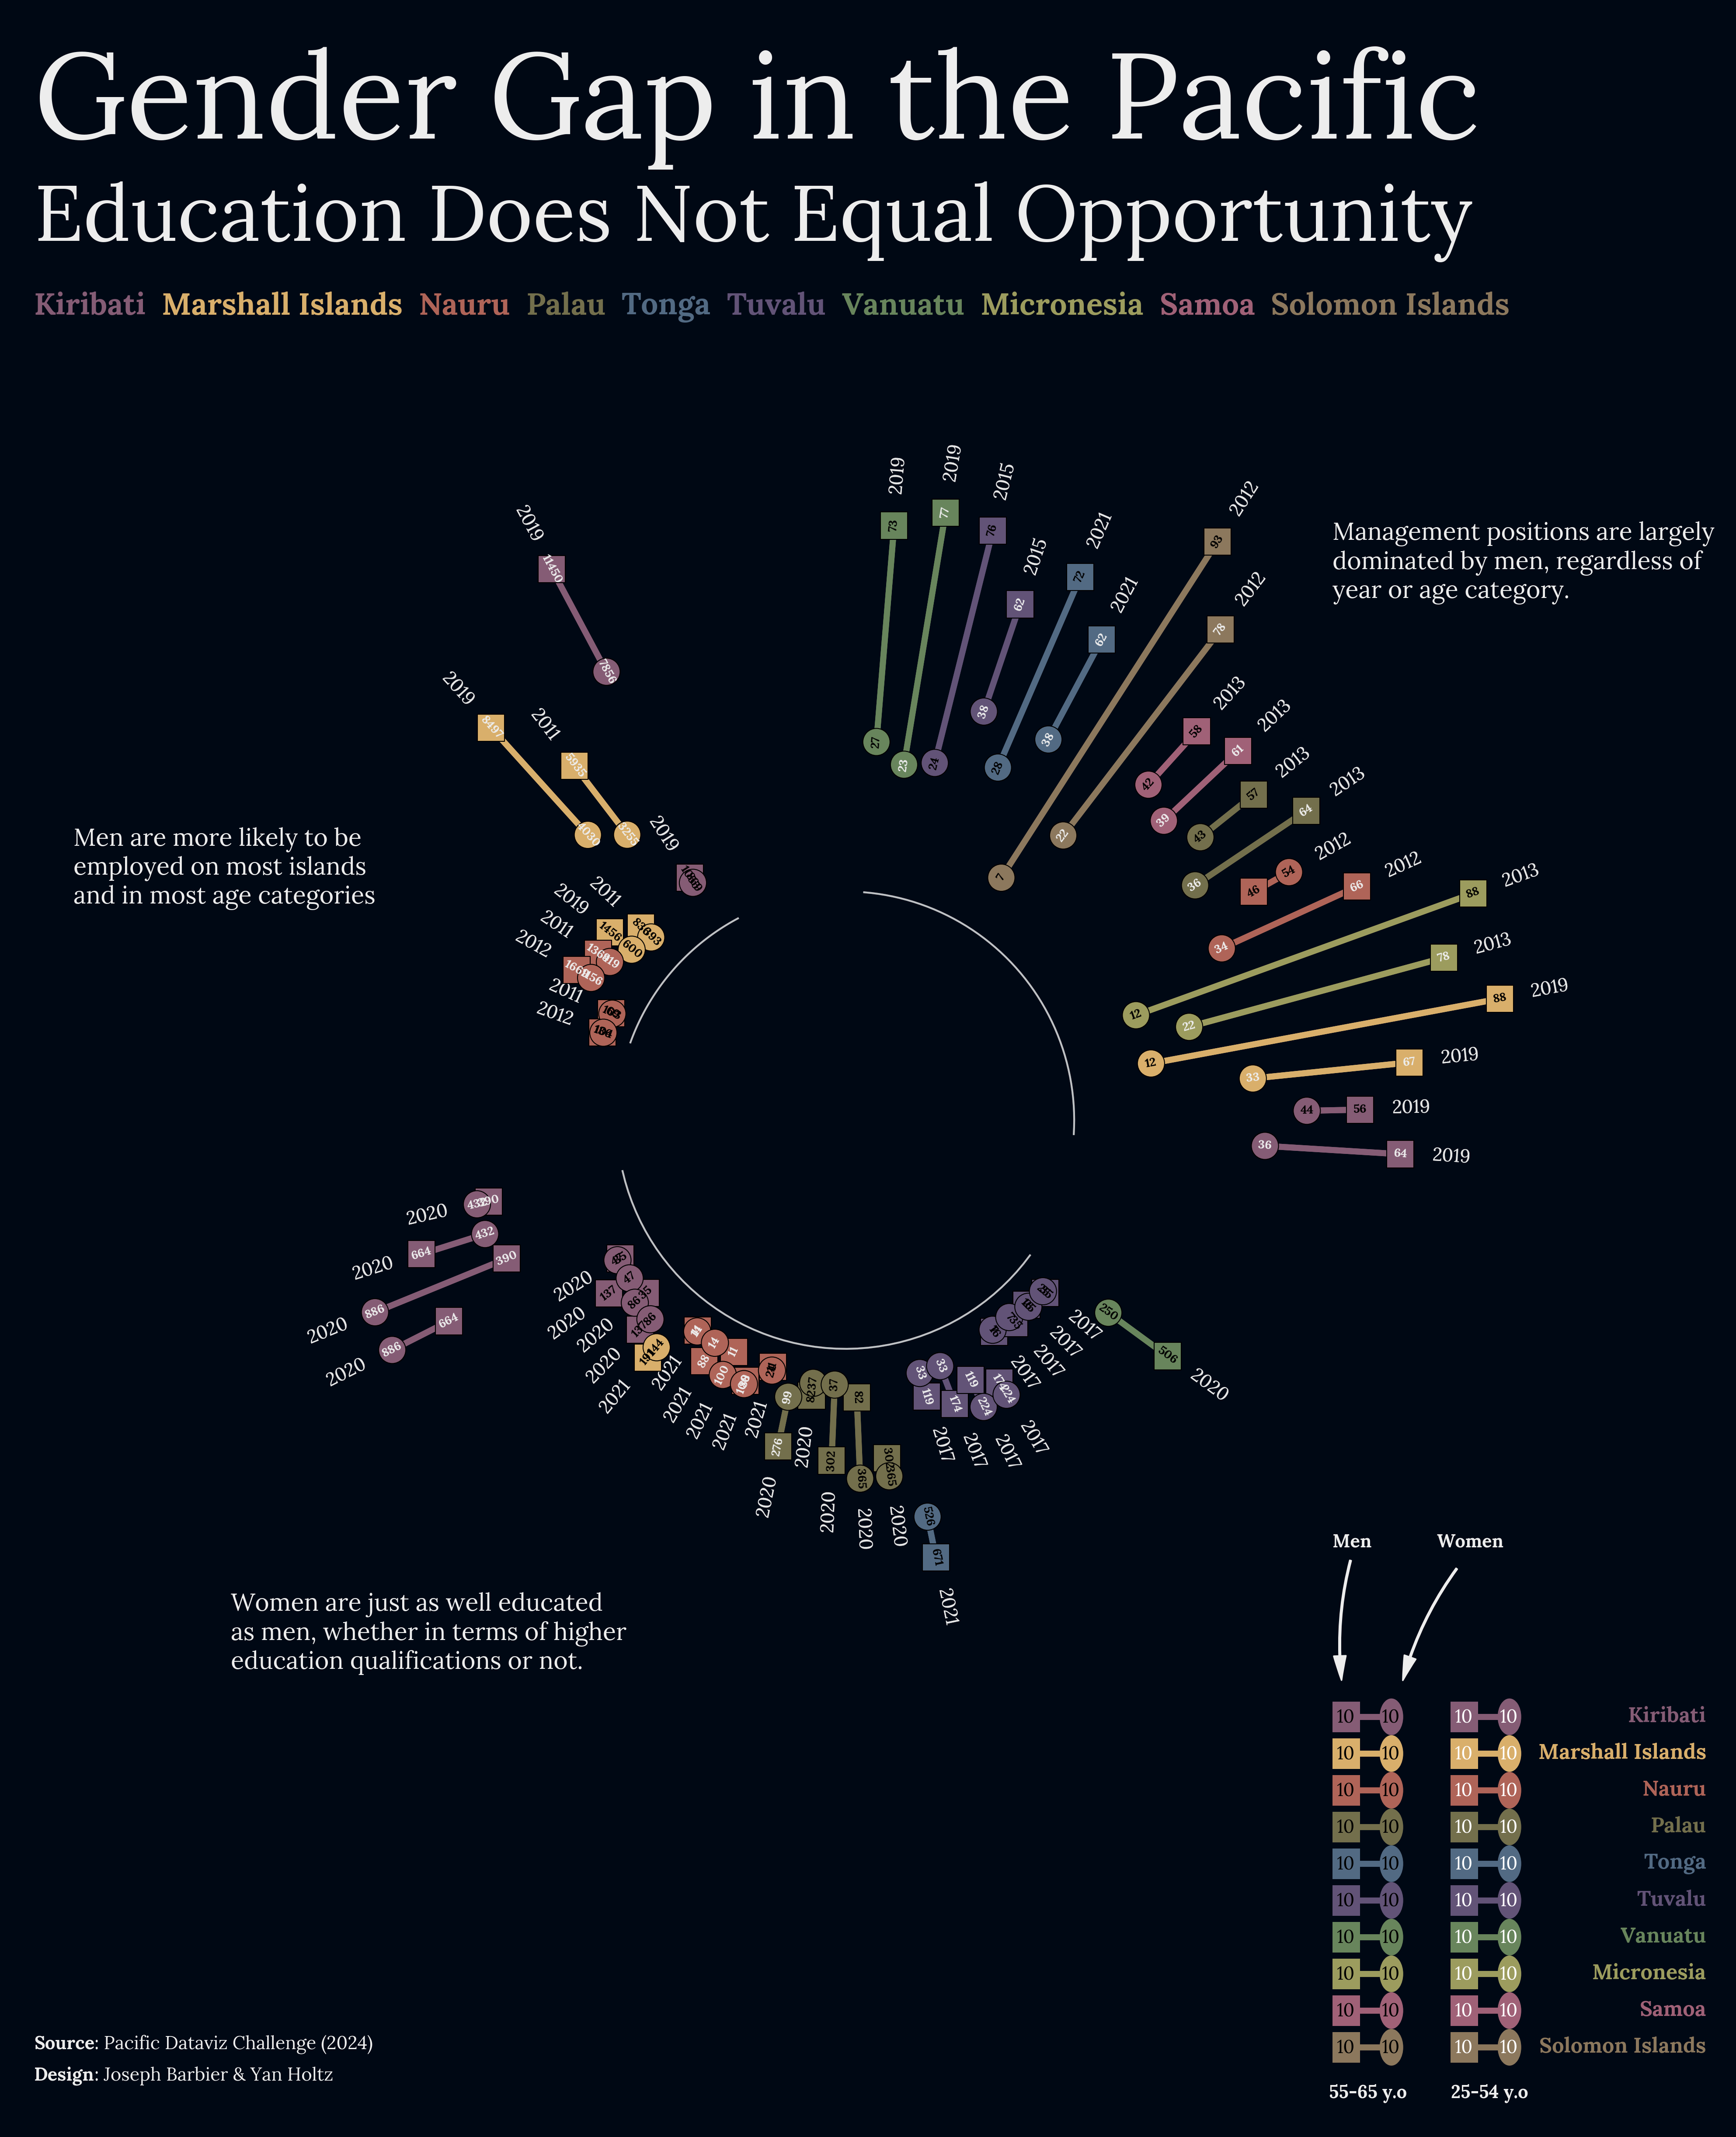

In [209]:
def get_alignement(angle, offset=0):
        if angle <= np.pi:
            alignment = 'right'
        else:
            alignment = 'left'
        return alignment

def get_label_rotation(angle):
    angle_deg = np.degrees(angle)
    rotation = (angle_deg + 90) % 360
    if 90 <= rotation < 270:
        rotation = (rotation + 180) % 360
    return rotation

def circular_lollipop(df, value, name, group, label_values, fig, ax, color_mapping, other_values, marker, year='year'):
    VALUES = df[value].values
    OTHER_VALUES = df[other_values].values
    LABELS = df[name].values
    GROUP = df[group].values
    ISLANDS = df['island'].values

    PAD = 6
    ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)

    GROUPS_SIZE = [len(i[1]) for i in df.groupby(group)]

    offset = 0
    IDXS = []
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD

    ax.set_theta_offset(np.pi/2)
    ax.set_ylim(-50, 100)
    ax.set_frame_on(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Calculate the minimum and maximum values for each pair
    BOTTOMS = np.minimum(VALUES, OTHER_VALUES)
    TOPS = np.maximum(VALUES, OTHER_VALUES)

    # Plot lines and markers
    for angle, bottom, top, island in zip(ANGLES[IDXS], BOTTOMS, TOPS, ISLANDS):
        ax.plot(
            [angle, angle],
            [bottom, top],
            color=color_mapping[island],
            linewidth=2
        )
    scatter = ax.scatter(
        ANGLES[IDXS],
        VALUES,
        c=[color_mapping[island] for island in ISLANDS],
        s=80,
        zorder=10,
        edgecolor="black",
        linewidth=0.3,
        marker=marker
    )

    # Plot year labels and small value labels
    YEARS = df[year].values
    LABEL_VALUES = df[label_values].values
    AGES = df['age'].values
    for angle, value, other_value, year, label_value, age in zip(ANGLES[IDXS], VALUES, OTHER_VALUES, YEARS, LABEL_VALUES, AGES):
        alignment = get_alignement(angle, offset)
        rotation = get_label_rotation(angle)
        alignment = 'center'
        
        # Add year label
        ax.text(
            x=angle, y=max(value, other_value)+10, s=year, ha=alignment, va="center", color=annotation_color,
            font=font, fontsize=6, rotation=rotation, rotation_mode="anchor"
        )

        # Add small value label next to the current marker
        label_color = text_color if age == '25-54' else "black"
        ax.text(
            x=angle, y=value, s=f"{label_value:.0f}", ha=alignment, va="center", color=label_color,
            font=boldfont, fontsize=4, rotation=rotation, rotation_mode="anchor", zorder=20
        )

    offset = 0 
    for group, size in zip(np.unique(GROUP), GROUPS_SIZE):
        x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
        y1 = [-5] * 50  # y-coordinate for the curved line
        ax.plot(x1, y1, color=curvedline_col, alpha=0.5, linewidth=0.6)        
        offset += size + PAD

# parameters
background_col = "#000814"
curvedline_col = "white"
line_col = "#eef4ed"
text_color = '#ededed'
annotation_color = "#E7E7E7"
colors = get_hex("Antique")
unique_islands = df['island'].unique()
color_mapping = dict(zip(unique_islands, colors[:len(unique_islands)]))
boldfont = load_font("https://github.com/cyrealtype/Lora-Cyrillic/blob/main/fonts/ttf/Lora-Bold.ttf?raw=true")
font = load_font("https://github.com/cyrealtype/Lora-Cyrillic/blob/main/fonts/ttf/Lora-Regular.ttf?raw=true")

fig, ax = plt.subplots(figsize=(9, 14), subplot_kw={"projection": "polar"}, dpi=500)
fig.set_facecolor(background_col)
ax.set_facecolor(background_col)

circular_lollipop(
   df=df,
   value="value_male_scaled",
   name="name",
   group="metric",
   label_values="value_male",
   fig=fig,
   ax=ax,
   color_mapping=color_mapping,
   marker="s",
   other_values="value_female_scaled"
)
circular_lollipop(
   df=df,
   value="value_female_scaled",
   name="name",
   group="metric",
   label_values="value_female",
   fig=fig,
   ax=ax,
   color_mapping=color_mapping,
   marker="o",
   other_values="value_male_scaled"
)

# title
text = """
<Gender Gap in the Pacific>
Education Does Not Equal Opportunity
"""
fig_text(
    x=0.1, y=0.85, s=text, 
    font=font, highlight_textprops=[{'fontsize':40}], color=text_color,
    fontsize=26, ha="left", va="top"
)

# subtitle
text = f"""
{" ".join(["<"+island+"> " for island in df["island"].unique()])}
"""
fig_text(
    x=0.1, y=0.77, s=text, font=boldfont, fontsize=10, ha="left", va="top",
    highlight_textprops=[{"color": color_mapping[island]} for island in df["island"].unique()]
)

# credit
text = """
<Source>: Pacific Dataviz Challenge (2024)
<Design>: Joseph Barbier & Yan Holtz
"""
fig_text(
    x=0.1, y=0.2, s=text, 
    font=font, highlight_textprops=[{'font': boldfont}]*2, color=text_color,
    fontsize=6, ha="left", va="top"
)

# legend
x = 0.95
y = 0.3
line_length = 0.03
for island in df["island"].unique():
    color = color_mapping[island]
    
    # add artists young
    square = plt.Rectangle((x-0.13, y-0.005), 0.014, 0.01, facecolor=color, transform=fig.transFigure, zorder=100)
    fig.add_artist(square)
    circle = plt.Circle((x-0.1, y), 0.006, facecolor=color, transform=fig.transFigure, zorder=100)
    fig.add_artist(circle)
    line = plt.Line2D([x-0.12, x-0.1], [y, y], color=color, linewidth=2, transform=fig.transFigure, zorder=100)
    fig.add_artist(line)

    # add artists old
    square = plt.Rectangle((x-0.19, y-0.005), 0.014, 0.01, facecolor=color, transform=fig.transFigure, zorder=100)
    fig.add_artist(square)
    circle = plt.Circle((x-0.16, y), 0.006, facecolor=color, transform=fig.transFigure, zorder=100)
    fig.add_artist(circle)
    line = plt.Line2D([x-0.18, x-0.16], [y, y], color=color, linewidth=2, transform=fig.transFigure, zorder=100)
    fig.add_artist(line)
    
    # Add text last with higher zorder
    fig.text(x, y, f"{island}", font=boldfont, color=color, fontsize=7, ha="right", va="center", transform=fig.transFigure, zorder=200)
    fig.text(x-0.128, y-0.002, "10", color="white", font=font, fontsize=6, transform=fig.transFigure, zorder=200)
    fig.text(x-0.105, y-0.002, "10", color="white", font=font, fontsize=6, transform=fig.transFigure, zorder=200)
    fig.text(x-0.188, y-0.002, "10", color="black", font=font, fontsize=6, transform=fig.transFigure, zorder=200)
    fig.text(x-0.165, y-0.002, "10", color="black", font=font, fontsize=6, transform=fig.transFigure, zorder=200)
    
    y -= 0.012

# Add legend labels of age
fig_text(x=x-0.11, y=0.18, s="25-54 y.o", font=boldfont, color=text_color, fontsize=6, ha="center", va="top")
fig_text(x=x-0.172, y=0.18, s="55-65 y.o", font=boldfont, color=text_color, fontsize=6, ha="center", va="top")

# Add legend labels of sex
fig_text(x=x-0.18, y=0.36, s="Men", font=boldfont, color=text_color, fontsize=6, ha="center", va="top")
fig_arrow(tail_position=(x-0.18, 0.353), head_position=(x-0.185, 0.31), color=text_color)
fig_text(x=x-0.12, y=0.36, s="Women", font=boldfont, color=text_color, fontsize=6, ha="center", va="top")
fig_arrow(tail_position=(x-0.125, 0.35), head_position=(x-0.155, 0.31), color=text_color)

# highlights education
text = """
Women are just as well educated
as men, whether in terms of higher
education qualifications or not.
"""
fig.text(
    x=0.2, y=0.35, s=text, font=font, color=text_color, fontsize=8, ha="left", va="top"
)

# highlights employment
text = """
Men are more likely to be
employed on most islands
and in most age categories
"""
fig.text(
    x=0.12, y=0.6, s=text, font=font, color=text_color, fontsize=8, ha="left", va="top"
)

# highlights management positions
text = """
Management positions are largely
dominated by men, regardless of
year or age category.
"""
fig.text(
    x=0.76, y=0.7, s=text, font=font, color=text_color, fontsize=8, ha="left", va="top"
)

plt.savefig("finalchart.png", bbox_inches="tight", dpi=500)
plt.show()

In [201]:
islands = " ".join(["<"+island+">" for island in df["island"].unique()])
islands

[{"color": color_mapping[island]} for island in df["island"].unique()]

[{'color': '#855C75FF'},
 {'color': '#D9AF6BFF'},
 {'color': '#AF6458FF'},
 {'color': '#736F4CFF'},
 {'color': '#526A83FF'},
 {'color': '#625377FF'},
 {'color': '#68855CFF'},
 {'color': '#9C9C5EFF'},
 {'color': '#A06177FF'},
 {'color': '#8C785DFF'}]